In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing as prepro 

#Insert your features and labels
samples = np.load('activation_maps_lines_image52_pixel.npy')
features = np.load('activation_maps_lines_image52_labelpixel.npy')

print("The shape of samples and featuresis:\n ",samples.shape,features.shape)
# Reshape your data  (pixels x features)
samples_num = samples.shape[0]   # Total number of pixels
features_num = samples.shape[1]  # Number of features for each pixel
X_reshaped = samples.reshape(samples_num,features_num)
y_reshaped = features.reshape(samples_num)  # Assuming y is your pixel-wise label mask
print(X_reshaped.shape,y_reshaped.shape)

The shape of samples and featuresis:
  (16384, 13) (16384, 1)
(16384, 13) (16384,)


In [28]:
samples = pd.DataFrame(samples,columns=np.arange(0,13))
samples['13']=features # Adding features coulmn into the samples dataset 
samples.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16384 entries, 0 to 16383
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16384 non-null  float64
 1   1       16384 non-null  float64
 2   2       16384 non-null  float64
 3   3       16384 non-null  float64
 4   4       16384 non-null  float64
 5   5       16384 non-null  float64
 6   6       16384 non-null  float64
 7   7       16384 non-null  float64
 8   8       16384 non-null  float64
 9   9       16384 non-null  float64
 10  10      16384 non-null  float64
 11  11      16384 non-null  float64
 12  12      16384 non-null  float64
 13  13      16384 non-null  uint8  
dtypes: float64(13), uint8(1)
memory usage: 1.6 MB


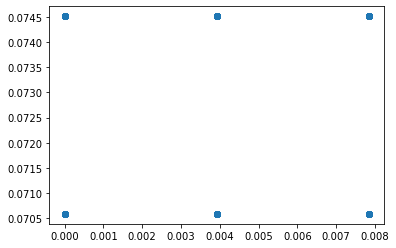

In [29]:
# Question A1
feature_1=samples[11]
feature_2=samples[12]
plt.scatter(feature_1,feature_2)

In [30]:
# Question A2
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
independent_feature=pd.DataFrame(samples[11])
dependent_feature  =pd.DataFrame(samples['13'])
# Split the reshaped data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(independent_feature, dependent_feature, test_size=0.2, random_state=42)
linear_regression=linear_model.LinearRegression()
linear_regression.fit(X_train,y_train)
linear_regression_predict=linear_regression.predict(X_test)

In [31]:
print("Mean Sqaured error: %.2f" % mean_squared_error(y_test,linear_regression_predict))

Mean Sqaured error: 13464.25


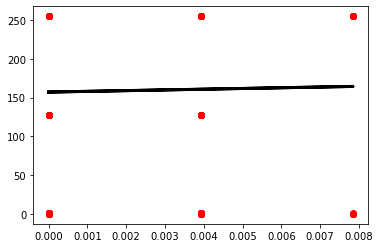

In [32]:
plt.scatter(X_test,y_test,color="red")
plt.plot(X_test,linear_regression_predict,color="black",linewidth=3)

In [42]:
# Question A3
independent_feature_mean=independent_feature.mean()
print("The mean value of class 1: \n",independent_feature_mean)
dependent_feature_mean=dependent_feature.mean()
print("The mean value of class 2: \n",dependent_feature_mean)
theta_1 = np.sum((independent_feature - independent_feature_mean) * (dependent_feature - dependent_feature_mean)) / np.sum((independent_feature - independent_feature_mean) ** 2)
print("The value of theta_1 : \n",theta_1)
theta_0 = feature_2_mean - theta_1 * feature_1_mean
print("The value of theta_0 : \n",theta_0)

The mean value of class 1: 
 11    0.000242
dtype: float64
The mean value of class 2: 
 13    157.484619
dtype: float64
The value of theta_1 : 
 11    0.0
13    NaN
dtype: float64
The value of theta_0 : 
 11    0.017235
13         NaN
dtype: float64


In [34]:
# Question A4
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
class_1 = samples.loc[:, samples.columns[:13]]
class_2 = samples.loc[:, samples.columns[13]]
data_train, data_test, output_train, output_test = train_test_split(class_1, class_2, test_size=0.2, random_state=42)
logreg = LogisticRegression()
# Train the model using the training set
logreg.fit(data_train, output_train)
# Make predictions on the test set
y_pred = logreg.predict(data_test)

# Calculate accuracy
accuracy = accuracy_score(output_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Mean Sqaured error: %.2f" % mean_squared_error(output_test,y_pred))

Accuracy: 56.12%
Mean Sqaured error: 0.55


In [40]:
# Question A5
# Knn Regressor
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(feature_1, feature_2, test_size=0.2, random_state=42)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
k = 3
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
check_data = samples[7]
check_data=check_data.values.reshape(-1,1)
predicted_value = knn_regressor.predict(check_data)
print("Predicted Value for {}: {}".format(check_data, predicted_value))


Mean Squared Error: 1.6508651470651024e-06
Predicted Value for [[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.00392157]
 [0.        ]]: [0.07320261 0.07320261 0.07320261 ... 0.07320261 0.0745098  0.07320261]


In [41]:
# Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
Decision_X_train, Decision_X_test, Decision_y_train, Decision_y_test = train_test_split(feature_1, feature_2, test_size=0.2, random_state=42)
Decision_X_train=Decision_X_train.values.reshape(-1,1)
Decision_X_test=Decision_X_test.values.reshape(-1,1)
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(Decision_X_train, Decision_y_train)
Decision_y_predict = decision_tree_regressor.predict(Decision_X_test)
mean_error = mean_squared_error(Decision_y_test, Decision_y_predict)
print("Mean Squared Error:", mean_error)
check_data = samples[7]
check_data=check_data.values.reshape(-1,1)
predicted_value = decision_tree_regressor.predict(check_data)
print("Predicted Value for {}: {}".format(check_data, predicted_value))

Mean Squared Error: 9.842085359383483e-08
Predicted Value for [[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.00392157]
 [0.        ]]: [0.07448438 0.07448438 0.07448438 ... 0.07448438 0.07440382 0.07448438]
